<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/_3soft_computing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np

# Objective function to minimize
def objective_function(x):
    return x**3 + np.sqrt(x) - 1

# Particle Swarm Optimization (PSO) algorithm
def pso_algorithm(num_particles, num_iterations, w1, w2, w3):
    # Initialize particles with random positions and velocities
    particles_position = np.random.uniform(0, 10, num_particles)
    particles_velocity = np.random.uniform(-1, 1, num_particles)

    # Initialize best positions and values
    personal_best_positions = particles_position.copy()
    personal_best_values = objective_function(personal_best_positions)

    # Initialize global best position and value
    global_best_position = particles_position[np.argmin(personal_best_values)]
    global_best_value = min(personal_best_values)

    # PSO main loop
    for iteration in range(num_iterations):
        for i in range(num_particles):
            # Update particle velocity and position
            r1, r2 = np.random.rand(), np.random.rand()
            particles_velocity[i] = w1 * particles_velocity[i] + w2 * r1 * (personal_best_positions[i] - particles_position[i]) + w3 * r2 * (global_best_position - particles_position[i])
            particles_position[i] += particles_velocity[i]

            # Update personal best
            current_value = objective_function(particles_position[i])
            if current_value < personal_best_values[i]:
                personal_best_values[i] = current_value
                personal_best_positions[i] = particles_position[i]

                # Update global best
                if current_value < global_best_value:
                    global_best_value = current_value
                    global_best_position = particles_position[i]

    return global_best_position, global_best_value

# Parameters
num_particles = 20
num_iterations = 100
w1, w2, w3 = 1, 1, 1

# Run PSO algorithm
best_position, best_value = pso_algorithm(num_particles, num_iterations, w1, w2, w3)

print("Best Position:", best_position)
print("Best Value:", best_value)


Best Position: 0.01133135353038861
Best Value: -0.8935497144859093


<ipython-input-6-6a37c5e938de>:5: RuntimeWarning: invalid value encountered in sqrt
  return x**3 + np.sqrt(x) - 1


PSO found best solution at f([0.02359428 0.87705227])=-0.8463825653744319
Global optimal at f([0.0, 0.0])=-1.0


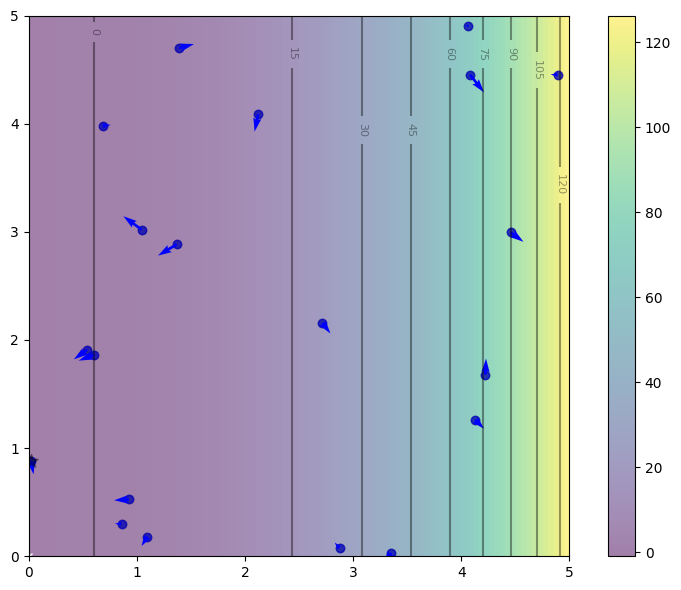

In [8]:
import numpy as np
import matplotlib.pyplot as plt


def f(x,y):
    "Objective function"
    return x**3 + np.sqrt(x) - 1

# Compute and plot the function in 3D within [0,5]x[0,5]
# x, y = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100)))
x, y = np.meshgrid(np.linspace(0, 5, 100), np.linspace(0, 5, 100))
z = f(x, y)

# Find the global minimum
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]

# Hyper-parameter of the algorithm
c1 = c2 = 1
w = 1

# Create particles
n_particles = 20
np.random.seed(100)
X = np.random.rand(2, n_particles) * 5
V = np.random.randn(2, n_particles) * 0.1

# Initialize data
pbest = X
pbest_obj = f(X[0], X[1])
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()

def update():
    "Function to do one iteration of particle swarm optimization"
    global V, X, pbest, pbest_obj, gbest, gbest_obj
    # Update params
    r1, r2 = np.random.rand(2)
    V = w * V + c1*r1*(pbest - X) + c2*r2*(gbest.reshape(-1,1)-X)
    X = X + V
    obj = f(X[0], X[1])
    pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
    pbest_obj = np.array([pbest_obj, obj]).min(axis=0)
    gbest = pbest[:, pbest_obj.argmin()]
    gbest_obj = pbest_obj.min()

# Set up base figure: The contour map
fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)
img = ax.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
pbest_plot = ax.scatter(pbest[0], pbest[1], marker='o', color='black', alpha=0.5)
p_plot = ax.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)
p_arrow = ax.quiver(X[0], X[1], V[0], V[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)
gbest_plot = plt.scatter([gbest[0]], [gbest[1]], marker='*', s=100, color='black', alpha=0.4)
ax.set_xlim([0,5])
ax.set_ylim([0,5])

# def animate(i):
#     "Steps of PSO: algorithm update and show in plot"
#     title = 'Iteration {:02d}'.format(i)
#     # Update params
#     update()
#     # Set picture
#     ax.set_title(title)
#     pbest_plot.set_offsets(pbest.T)
#     p_plot.set_offsets(X.T)
#     p_arrow.set_offsets(X.T)
#     p_arrow.set_UVC(V[0], V[1])
#     gbest_plot.set_offsets(gbest.reshape(1,-1))
#     return ax, pbest_plot, p_plot, p_arrow, gbest_plot

# anim = FuncAnimation(fig, animate, frames=list(range(1,50)), interval=500, blit=False, repeat=True)
# anim.save("PSO.gif", dpi=120, writer="imagemagick")

print("PSO found best solution at f({})={}".format(gbest, gbest_obj))
print("Global optimal at f({})={}".format([x_min,y_min], f(x_min,y_min)))

In [ ]:
import numpy as np

# Modified objective function to handle non-negative values
def objective_function(x):
    return x**3 + np.sqrt(np.maximum(x, 0)) - 1
import numpy as np

# Modified objective function to handle non-negative values
def objective_function(x):
    return x**3 + np.sqrt(np.maximum(x, 0)) - 1
# Particle Swarm Optimization (PSO) algorithm
def pso_algorithm(num_particles, num_iterations, w1, w2, w3):
    # Initialize particles with random positions and velocities
    particles_position = np.random.uniform(0, 10, num_particles)
    particles_velocity = np.random.uniform(-1, 1, num_particles)

    # Initialize best positions and values
    personal_best_positions = particles_position.copy()
    personal_best_values = objective_function(personal_best_positions)

    # Initialize global best position and value
    global_best_position = particles_position[np.argmin(personal_best_values)]
    global_best_value = min(personal_best_values)

    # PSO main loop
    for iteration in range(num_iterations):
        for i in range(num_particles):
            # Update particle velocity and position
            r1, r2 = np.random.rand(), np.random.rand()
            particles_velocity[i] = w1 * particles_velocity[i] + w2 * r1 * (personal_best_positions[i] - particles_position[i]) + w3 * r2 * (global_best_position - particles_position[i])
            particles_position[i] += particles_velocity[i]

            # Update personal best
            current_value = objective_function(particles_position[i])
            if current_value < personal_best_values[i]:
                personal_best_values[i] = current_value
                personal_best_positions[i] = particles_position[i]

                # Update global best
                if current_value < global_best_value:
                    global_best_value = current_value
                    global_best_position = particles_position[i]

    return global_best_position, global_best_value

# Parameters
num_particles = 20
num_iterations = 100
w1, w2, w3 = 1, 1, 1

# Run PSO algorithm
best_position, best_value = pso_algorithm(num_particles, num_iterations, w1, w2, w3)

print("Best Position:", best_position)
print("Best Value:", best_value)



Best Position: -4.049355053504197e+39
Best Value: -6.63983938489047e+118


In [ ]:
import numpy as np

# Modified objective function to handle non-negative values
def objective_function(x):
    return x**3 + np.sqrt(np.maximum(x, 0)) - 1

# Particle Swarm Optimization (PSO) algorithm
def pso_algorithm(num_particles, num_iterations, w1, w2, w3):
    # Initialize particles with random positions and velocities
    particles_position = np.random.uniform(0, 10, num_particles)
    particles_velocity = np.random.uniform(-1, 1, num_particles)

    # Initialize best positions and values
    personal_best_positions = particles_position.copy()
    personal_best_values = objective_function(personal_best_positions)

    # Initialize global best position and value
    global_best_position = particles_position[np.argmin(personal_best_values)]
    global_best_value = min(personal_best_values)

    # PSO main loop
    for iteration in range(num_iterations):
        for i in range(num_particles):
            # Update particle velocity and position
            r1, r2 = np.random.rand(), np.random.rand()
            particles_velocity[i] = w1 * particles_velocity[i] + w2 * r1 * (personal_best_positions[i] - particles_position[i]) + w3 * r2 * (global_best_position - particles_position[i])
            particles_position[i] += particles_velocity[i]

            # Update personal best
            current_value = objective_function(particles_position[i])
            if current_value < personal_best_values[i]:
                personal_best_values[i] = current_value
                personal_best_positions[i] = particles_position[i]

                # Update global best
                if current_value < global_best_value:
                    global_best_value = current_value
                    global_best_position = particles_position[i]

        # Print best position and value for the first 5 epochs
        if iteration < 100:
            print(f"Epoch {iteration + 1}: Best Position - {global_best_position}, Best Value - {global_best_value}")

    return global_best_position, global_best_value

# Parameters
num_particles = 20
num_iterations = 100
w1, w2, w3 = 1, 1, 1

# Run PSO algorithm
best_position, best_value = pso_algorithm(num_particles, num_iterations, w1, w2, w3)

print("\nFinal Result:")
print("Best Position:", best_position)
print("Best Value:", best_value)


Epoch 1: Best Position - -0.28251816314671774, Best Value - -1.0225496145024793
Epoch 2: Best Position - -11.153805873202849, Best Value - -1388.6158265811498
Epoch 3: Best Position - -54.70533534386901, Best Value - -163716.21915851618
Epoch 4: Best Position - -136.4104732178101, Best Value - -2538302.1502808826
Epoch 5: Best Position - -265.9921104885455, Best Value - -18819422.35885311
Epoch 6: Best Position - -659.4897226556291, Best Value - -286829685.9917855
Epoch 7: Best Position - -1535.40466752237, Best Value - -3619666593.3604307
Epoch 8: Best Position - -2928.0502279813727, Best Value - -25103574616.33961
Epoch 9: Best Position - -6625.036426890083, Best Value - -290780187049.2902
Epoch 10: Best Position - -13271.909749206381, Best Value - -2337761808028.762
Epoch 11: Best Position - -41680.76674882862, Best Value - -72411425745233.67
Epoch 12: Best Position - -107853.79227509345, Best Value - -1254602822215051.0
Epoch 13: Best Position - -335701.9892184438, Best Value - -3.

In [ ]:
import numpy as np

def objective_function(x):
    return x**3 + np.sqrt(np.maximum(x, 0)) - 1

def initialize_particles(num_particles):
    particles_position = np.random.uniform(0, 10, num_particles)
    particles_velocity = np.random.uniform(-1, 1, num_particles)
    personal_best_positions = particles_position.copy()
    personal_best_values = objective_function(personal_best_positions)
    global_best_position = particles_position[np.argmin(personal_best_values)]
    global_best_value = min(personal_best_values)
    return particles_position, particles_velocity, personal_best_positions, personal_best_values, global_best_position, global_best_value

def update_particles(particles_position, particles_velocity, personal_best_positions, personal_best_values, global_best_position, global_best_value, w1, w2, w3):
    for i in range(len(particles_position)):
        r1, r2 = np.random.rand(), np.random.rand()
        particles_velocity[i] = w1 * particles_velocity[i] + w2 * r1 * (personal_best_positions[i] - particles_position[i]) + w3 * r2 * (global_best_position - particles_position[i])
        particles_position[i] += particles_velocity[i]

        current_value = objective_function(particles_position[i])

        if current_value < personal_best_values[i]:
            personal_best_values[i] = current_value
            personal_best_positions[i] = particles_position[i]

            if current_value < global_best_value:
                global_best_value = current_value
                global_best_position = particles_position[i]

    return particles_position, particles_velocity, personal_best_positions, personal_best_values, global_best_position, global_best_value

def pso_algorithm(num_particles, num_iterations, w1, w2, w3):
    particles_position, particles_velocity, personal_best_positions, personal_best_values, global_best_position, global_best_value = initialize_particles(num_particles)

    for iteration in range(num_iterations):
        particles_position, particles_velocity, personal_best_positions, personal_best_values, global_best_position, global_best_value = update_particles(particles_position, particles_velocity, personal_best_positions, personal_best_values, global_best_position, global_best_value, w1, w2, w3)

        if iteration < 5:
            print(f"Epoch {iteration + 1}: Best Position - {global_best_position}, Best Value - {global_best_value}")

    return global_best_position, global_best_value

# Parameters
num_particles = 20
num_iterations = 100
w1, w2, w3 = 1, 1, 1

# Run PSO algorithm
best_position, best_value = pso_algorithm(num_particles, num_iterations, w1, w2, w3)

print("\nFinal Result:")
print("Best Position:", best_position)
print("Best Value:", best_value)


Epoch 1: Best Position - -0.5768573470281917, Best Value - -1.191957588288969
Epoch 2: Best Position - -8.468290524575343, Best Value - -608.2775793343272
Epoch 3: Best Position - -41.92592196202803, Best Value - -73697.6700485644
Epoch 4: Best Position - -136.24150339715237, Best Value - -2528881.3507340695
Epoch 5: Best Position - -397.88327910721654, Best Value - -62989342.096285984

Final Result:
Best Position: -8.903015182863436e+39
Best Value: -7.056857406697e+119


In [ ]:
import numpy as np

def objective_function(x):
    return x**3 + np.sqrt(np.maximum(x, 0)) - 1

def initialize_particles(num_particles):
    particles_position = np.random.uniform(0, 10, num_particles)
    particles_velocity = np.random.uniform(-1, 1, num_particles)
    personal_best_positions = particles_position.copy()
    personal_best_values = objective_function(personal_best_positions)
    global_best_position = particles_position[np.argmin(personal_best_values)]
    global_best_value = min(personal_best_values)
    return particles_position, particles_velocity, personal_best_positions, personal_best_values, global_best_position, global_best_value

def update_particles(particles_position, particles_velocity, personal_best_positions, personal_best_values, global_best_position, global_best_value, w1, w2, w3):
    for i in range(len(particles_position)):
        r1, r2 = np.random.rand(), np.random.rand()
        particles_velocity[i] = w1 * particles_velocity[i] + w2 * r1 * (personal_best_positions[i] - particles_position[i]) + w3 * r2 * (global_best_position - particles_position[i])
        particles_position[i] += particles_velocity[i]

        current_value = objective_function(particles_position[i])

        if current_value < personal_best_values[i]:
            personal_best_values[i] = current_value
            personal_best_positions[i] = particles_position[i]

            if current_value < global_best_value:
                global_best_value = current_value
                global_best_position = particles_position[i]

    return particles_position, particles_velocity, personal_best_positions, personal_best_values, global_best_position, global_best_value

def pso_algorithm(num_particles, num_iterations, w1, w2, w3):
    particles_position, particles_velocity, personal_best_positions, personal_best_values, global_best_position, global_best_value = initialize_particles(num_particles)

    for iteration in range(num_iterations):
        particles_position, particles_velocity, personal_best_positions, personal_best_values, global_best_position, global_best_value = update_particles(particles_position, particles_velocity, personal_best_positions, personal_best_values, global_best_position, global_best_value, w1, w2, w3)

        if iteration < 5:
            print(f"Epoch {iteration + 1}: Best Position - {global_best_position}, Best Value - {global_best_value}")

    return global_best_position, global_best_value

# Parameters
num_particles = 20
num_iterations = 100
w1, w2, w3 = 0.5, 1.5, 1.5  # Adjusted weights for better convergence

# Run PSO algorithm
best_position, best_value = pso_algorithm(num_particles, num_iterations, w1, w2, w3)

print("\nFinal Result:")
print("Best Position:", best_position)
print("Best Value:", best_value)


Epoch 1: Best Position - -20.54110586895157, Best Value - -8668.053209823396
Epoch 2: Best Position - -85.37427173791414, Best Value - -622274.112577144
Epoch 3: Best Position - -1227.012315389412, Best Value - -1847339708.0860126
Epoch 4: Best Position - -3026.2617277296276, Best Value - -27715291866.934925
Epoch 5: Best Position - -22148.59002485752, Best Value - -10865213210514.76

Final Result:
Best Position: -2.39916334498223e+73
Best Value: -1.3809547640646937e+220


In [ ]:
import numpy as np

def objective_function(x):
    return x**3 + np.sqrt(x) - 1

def initialize_particles(num_particles, num_dimensions):
    particles = np.random.rand(num_particles, num_dimensions)
    velocities = np.random.rand(num_particles, num_dimensions)
    fitness_values = np.array([objective_function(p) for p in particles])
    return particles, velocities, fitness_values

def update_particles(particles, velocities, personal_best_positions, global_best_position, w=1, c1=1, c2=1):
    num_particles, num_dimensions = particles.shape

    # Update velocity
    inertia_term = w * velocities
    cognitive_term = c1 * np.random.rand(num_particles, num_dimensions) * (personal_best_positions - particles)
    social_term = c2 * np.random.rand(num_particles, num_dimensions) * (global_best_position - particles)
    velocities = inertia_term + cognitive_term + social_term

    # Update position
    particles = particles + velocities

    return particles, velocities

def update_best_positions(particles, fitness_values, personal_best_positions, global_best_position):
    num_particles, num_dimensions = particles.shape

    # Update personal best positions
    improved_particles = fitness_values < np.array([objective_function(p) for p in personal_best_positions])
    for i in range(num_particles):
        if improved_particles[i]:
            personal_best_positions[i, :] = particles[i, :]

    # Update global best position
    best_particle = np.argmin(fitness_values)
    if fitness_values[best_particle] < objective_function(global_best_position):
        global_best_position = particles[best_particle, :]

    return personal_best_positions, global_best_position

def particle_swarm_optimization(num_particles, num_dimensions, num_iterations, convergence_threshold=1e-6):
    # Initialization
    particles, velocities, fitness_values = initialize_particles(num_particles, num_dimensions)
    personal_best_positions = particles.copy()
    global_best_position = particles[np.argmin(fitness_values), :]

    # Main loop
    for iteration in range(num_iterations):
        # Update particles
        particles, velocities = update_particles(particles, velocities, personal_best_positions, global_best_position)

        # Evaluate fitness
        fitness_values = np.array([objective_function(p) for p in particles])

        # Update personal and global best positions
        personal_best_positions, global_best_position = update_best_positions(
            particles, fitness_values, personal_best_positions, global_best_position
        )

        # Check for convergence
        if np.abs(objective_function(global_best_position) - objective_function(personal_best_positions.min(axis=0))) < convergence_threshold:
            print(f"Converged at iteration {iteration + 1}")
            break

        # Print the best fitness value at each iteration
        print(f"Iteration {iteration + 1}: Best Fitness = {objective_function(global_best_position)}")

    return global_best_position, objective_function(global_best_position)

# Call the PSO function
best_position, best_value = particle_swarm_optimization(num_particles=20, num_dimensions=1, num_iterations=100)

# Report the results
print(f"Optimal Position: {best_position}")
print(f"Optimal Value: {best_value}")


Converged at iteration 1
Optimal Position: [0.00032372]
Optimal Value: [-0.98200786]


In [ ]:
import numpy as np

def objective_function(x):
    return x**3 + np.sqrt(np.abs(x)) - 1


def initialize_particles(num_particles, num_dimensions):
    particles = np.random.rand(num_particles, num_dimensions)
    velocities = np.random.rand(num_particles, num_dimensions)
    fitness_values = np.array([objective_function(p) for p in particles])
    return particles, velocities, fitness_values

def update_particles(particles, velocities, personal_best_positions, global_best_position, inertia_weight=0.5):
    num_particles, num_dimensions = particles.shape

    # Update velocity
    inertia_term = inertia_weight * velocities
    cognitive_term = np.random.rand() * (personal_best_positions - particles)
    social_term = np.random.rand() * (global_best_position - particles)
    velocities = inertia_term + cognitive_term + social_term

    # Update position
    particles = particles + velocities

    return particles, velocities

def update_best_positions(particles, fitness_values, personal_best_positions, global_best_position):
    num_particles, num_dimensions = particles.shape

    # Update personal best positions
    improved_particles = fitness_values < np.array([objective_function(p) for p in fitness_values])
    for i in range(num_particles):
        if improved_particles[i]:
            personal_best_positions[i, :] = particles[i, :]

    # Update global best position
    best_particle = np.argmin(fitness_values)
    if fitness_values[best_particle] < objective_function(global_best_position):
        global_best_position = particles[best_particle, :]

    return personal_best_positions, global_best_position

def particle_swarm_optimization(num_particles, num_dimensions, num_iterations, convergence_threshold=1e-6, inertia_weight=0.5):
    # Initialization
    particles, velocities, fitness_values = initialize_particles(num_particles, num_dimensions)
    personal_best_positions = particles.copy()
    global_best_position = particles[np.argmin(fitness_values), :]

    # Main loop
    for iteration in range(num_iterations):
        # Update particles
        particles, velocities = update_particles(particles, velocities, personal_best_positions, global_best_position, inertia_weight)

        # Evaluate fitness
        fitness_values = np.array([objective_function(p) for p in particles])

        # Update personal and global best positions
        personal_best_positions, global_best_position = update_best_positions(
            particles, fitness_values, personal_best_positions, global_best_position
        )

        # Print the best fitness value and position at each iteration
        print(f"Iteration {iteration + 1}: Best Position = {global_best_position}, Best Fitness = {objective_function(global_best_position)}")

        # Check for convergence
        if np.abs(objective_function(global_best_position) - objective_function(personal_best_positions.min(axis=0))) < convergence_threshold:
            print(f"Converged at iteration {iteration + 1}")
            break

    return global_best_position, objective_function(global_best_position)

# Call the PSO function
best_position, best_value = particle_swarm_optimization(num_particles=20, num_dimensions=1, num_iterations=100)


Iteration 1: Best Position = [0.01087302], Best Fitness = [-0.89572492]
Converged at iteration 1


In [ ]:
import numpy as np

# Step 1: Define the objective function
def objective_function(x):
    return x**3 + np.sqrt(np.abs(x)) - 1

# Step 2: Define the initialize_particles function
def initialize_particles(num_particles, num_dimensions):
    particles = np.random.rand(num_particles, num_dimensions)
    velocities = np.random.rand(num_particles, num_dimensions)
    fitness_values = np.array([objective_function(p) for p in particles])
    return particles, velocities, fitness_values

# Step 3: Define the update_particles function
def update_particles(particles, velocities, personal_best_positions, global_best_position, inertia_weight=0.5):
    num_particles, num_dimensions = particles.shape

    # Update velocity
    inertia_term = inertia_weight * velocities
    cognitive_term = np.random.rand() * (personal_best_positions - particles)
    social_term = np.random.rand() * (global_best_position - particles)
    velocities = inertia_term + cognitive_term + social_term

    # Update position
    particles = particles + velocities

    return particles, velocities

# Step 4: Define the update_best_positions function
def update_best_positions(particles, fitness_values, personal_best_positions, global_best_position):
    num_particles, num_dimensions = particles.shape

    # Update personal best positions
    improved_particles = fitness_values < np.array([objective_function(p) for p in personal_best_positions])
    for i in range(num_particles):
        if improved_particles[i]:
            personal_best_positions[i, :] = particles[i, :]

    # Update global best position
    best_particle = np.argmin(fitness_values)
    if fitness_values[best_particle] < objective_function(global_best_position):
        global_best_position = particles[best_particle, :]

    return personal_best_positions, global_best_position

# Step 5: Define the particle_swarm_optimization function
def particle_swarm_optimization(num_particles, num_dimensions, num_iterations, convergence_threshold=1e-6, inertia_weight=0.5):
    # Initialization
    particles, velocities, fitness_values = initialize_particles(num_particles, num_dimensions)
    personal_best_positions = particles.copy()
    global_best_position = particles[np.argmin(fitness_values), :]

    # Main loop
    for iteration in range(num_iterations):
        # Update particles
        particles, velocities = update_particles(particles, velocities, personal_best_positions, global_best_position, inertia_weight)

        # Evaluate fitness
        fitness_values = np.array([objective_function(p) for p in particles])

        # Update personal and global best positions
        personal_best_positions, global_best_position = update_best_positions(
            particles, fitness_values, personal_best_positions, global_best_position
        )

        # Print the best fitness value and position at each iteration
        if (iteration + 1) % 10 == 0:  # Print every 10 iterations
            print(f"Iteration {iteration + 1}: Best Position = {global_best_position}, Best Fitness = {objective_function(global_best_position)}")

        # Check for convergence
        if np.abs(objective_function(global_best_position) - objective_function(personal_best_positions.min(axis=0))) < convergence_threshold:
            print(f"Converged at iteration {iteration + 1}")
            break

    # After optimization, print the final best position and fitness value
    print(f"\nFinal Best Position = {global_best_position}, Final Best Fitness = {objective_function(global_best_position)}")

    return global_best_position, objective_function(global_best_position)

# Step 6: Call the PSO function
best_position, best_value = particle_swarm_optimization(num_particles=20, num_dimensions=1, num_iterations=100)


Converged at iteration 1

Final Best Position = [0.0741996], Final Best Fitness = [-0.72719544]


In [ ]:
import numpy as np

def objective_function(x):
    return x**3 + np.sqrt(np.abs(x)) - 1

def initialize_particles(num_particles, num_dimensions):
    particles = np.random.rand(num_particles, num_dimensions)
    velocities = np.random.rand(num_particles, num_dimensions)
    fitness_values = np.array([objective_function(p) for p in particles])
    return particles, velocities, fitness_values

def update_particles(particles, velocities, personal_best_positions, global_best_position, inertia_weight=0.5):
    num_particles, num_dimensions = particles.shape

    inertia_term = inertia_weight * velocities
    cognitive_term = np.random.rand() * (personal_best_positions - particles)
    social_term = np.random.rand() * (global_best_position - particles)
    velocities = inertia_term + cognitive_term + social_term

    particles = particles + velocities

    return particles, velocities

def update_best_positions(particles, fitness_values, personal_best_positions, global_best_position):
    num_particles, num_dimensions = particles.shape

    improved_particles = fitness_values < np.array([objective_function(p) for p in personal_best_positions])
    for i in range(num_particles):
        if improved_particles[i]:
            personal_best_positions[i, :] = particles[i, :]

    best_particle = np.argmin(fitness_values)
    if fitness_values[best_particle] < objective_function(global_best_position):
        global_best_position = particles[best_particle, :]

    return personal_best_positions, global_best_position

def particle_swarm_optimization(num_particles, num_dimensions, num_iterations, convergence_threshold=1e-6, inertia_weight=0.5):
    particles, velocities, fitness_values = initialize_particles(num_particles, num_dimensions)
    personal_best_positions = particles.copy()
    global_best_position = particles[np.argmin(fitness_values), :]

    for iteration in range(num_iterations):
        particles, velocities = update_particles(particles, velocities, personal_best_positions, global_best_position, inertia_weight)
        fitness_values = np.array([objective_function(p) for p in particles])
        personal_best_positions, global_best_position = update_best_positions(
            particles, fitness_values, personal_best_positions, global_best_position
        )

        # Print the best fitness value and position at each iteration
        print(f"Epoch {iteration + 1}: Best Position - {global_best_position}, Best Value - {objective_function(global_best_position)}")

        # Check for convergence
        if np.abs(objective_function(global_best_position) - objective_function(personal_best_positions.min(axis=0))) < convergence_threshold:
            print(f"Converged at iteration {iteration + 1}")
            break

    # After optimization, print the final best position and fitness value
    print(f"\nFinal Result:\nBest Position: {global_best_position}\nBest Value: {objective_function(global_best_position)}")

    return global_best_position, objective_function(global_best_position)

# Call the PSO function
best_position, best_value = particle_swarm_optimization(num_particles=20, num_dimensions=1, num_iterations=100)


Epoch 1: Best Position - [0.00844612], Best Value - [-0.90809665]
Converged at iteration 1

Final Result:
Best Position: [0.00844612]
Best Value: [-0.90809665]


In [ ]:
import numpy as np

def objective_function(x):
    return x**3 + np.sqrt(np.abs(x)) - 1

def initialize_particles(num_particles, num_dimensions):
    particles = np.random.rand(num_particles, num_dimensions)
    velocities = np.random.rand(num_particles, num_dimensions)
    fitness_values = np.array([objective_function(p) for p in particles])
    return particles, velocities, fitness_values

def update_particles(particles, velocities, personal_best_positions, global_best_position, inertia_weight=0.5):
    num_particles, num_dimensions = particles.shape

    inertia_term = inertia_weight * velocities
    cognitive_term = np.random.rand() * (personal_best_positions - particles)
    social_term = np.random.rand() * (global_best_position - particles)
    velocities = inertia_term + cognitive_term + social_term

    particles = particles + velocities

    return particles, velocities

def update_best_positions(particles, fitness_values, personal_best_positions, global_best_position):
    num_particles, num_dimensions = particles.shape

    improved_particles = fitness_values < np.array([objective_function(p) for p in personal_best_positions])
    for i in range(num_particles):
        if improved_particles[i]:
            personal_best_positions[i, :] = particles[i, :]

    best_particle = np.argmin(fitness_values)
    if fitness_values[best_particle] < objective_function(global_best_position):
        global_best_position = particles[best_particle, :]

    return personal_best_positions, global_best_position

def particle_swarm_optimization(num_particles, num_dimensions, num_iterations, convergence_threshold=1e-6, inertia_weight=0.5):
    particles, velocities, fitness_values = initialize_particles(num_particles, num_dimensions)
    personal_best_positions = particles.copy()
    global_best_position = particles[np.argmin(fitness_values), :]

    for iteration in range(num_iterations):
        particles, velocities = update_particles(particles, velocities, personal_best_positions, global_best_position, inertia_weight)
        fitness_values = np.array([objective_function(p) for p in particles])
        personal_best_positions, global_best_position = update_best_positions(
            particles, fitness_values, personal_best_positions, global_best_position
        )

        # Print the best fitness value and position at each epoch
        print(f"Epoch {iteration + 1}: Best Position - {global_best_position}, Best Value - {objective_function(global_best_position)}")

        # Check for convergence
        if np.abs(objective_function(global_best_position) - objective_function(personal_best_positions.min(axis=0))) < convergence_threshold:
            print(f"Converged at iteration {iteration + 1}")
            break

    # After 100 epochs, print the final best position and fitness value
    print(f"\nFinal Result:\nBest Position: {global_best_position}\nBest Value: {objective_function(global_best_position)}")

    return global_best_position, objective_function(global_best_position)

# Call the PSO function for 100 epochs
best_position, best_value = particle_swarm_optimization(num_particles=20, num_dimensions=1, num_iterations=100)


Epoch 1: Best Position - [0.01492297], Best Value - [-0.87783705]
Converged at iteration 1

Final Result:
Best Position: [0.01492297]
Best Value: [-0.87783705]


In [10]:
import numpy as np

def objective_function(x):
    return x**3 + np.sqrt(np.abs(x)) - 1

def initialize_particles(num_particles, num_dimensions):
    particles = np.random.rand(num_particles, num_dimensions)
    velocities = np.random.rand(num_particles, num_dimensions)
    fitness_values = np.array([objective_function(p) for p in particles])
    return particles, velocities, fitness_values

def update_particles(particles, velocities, personal_best_positions, global_best_position, inertia_weight=0.5):
    num_particles, num_dimensions = particles.shape

    inertia_term = inertia_weight * velocities
    cognitive_term = np.random.rand() * (personal_best_positions - particles)
    social_term = np.random.rand() * (global_best_position - particles)
    velocities = inertia_term + cognitive_term + social_term

    particles = particles + velocities

    return particles, velocities

def update_best_positions(particles, fitness_values, personal_best_positions, global_best_position):
    num_particles, num_dimensions = particles.shape

    improved_particles = fitness_values < np.array([objective_function(p) for p in personal_best_positions])
    for i in range(num_particles):
        if improved_particles[i]:
            personal_best_positions[i, :] = particles[i, :]

    best_particle = np.argmin(fitness_values)
    if fitness_values[best_particle] < objective_function(global_best_position):
        global_best_position = particles[best_particle, :]

    return personal_best_positions, global_best_position

def particle_swarm_optimization(num_particles, num_dimensions, num_iterations, convergence_threshold=1e-6, inertia_weight=0.5):
    particles, velocities, fitness_values = initialize_particles(num_particles, num_dimensions)
    personal_best_positions = particles.copy()
    global_best_position = particles[np.argmin(fitness_values), :]

    for iteration in range(num_iterations):
        particles, velocities = update_particles(particles, velocities, personal_best_positions, global_best_position, inertia_weight)
        fitness_values = np.array([objective_function(p) for p in particles])
        personal_best_positions, global_best_position = update_best_positions(
            particles, fitness_values, personal_best_positions, global_best_position
        )

        # Print the best fitness value and position at each epoch
        print(f"Epoch {iteration + 1}: Best Position - {global_best_position}, Best Value - {objective_function(global_best_position)}")

        # Check for convergence
        if np.abs(objective_function(global_best_position) - objective_function(personal_best_positions.min(axis=0))) < convergence_threshold:
            print(f"Converged at iteration {iteration + 1}")
            break

    # After 100 epochs, print the final best position and fitness value
    print(f"\nFinal Result:\nBest Position: {global_best_position}\nBest Value: {objective_function(global_best_position)}")

    return global_best_position, objective_function(global_best_position)

# Call the PSO function for 100 epochs
best_position, best_value = particle_swarm_optimization(num_particles=20, num_dimensions=1, num_iterations=100)


Epoch 1: Best Position - [0.1107879], Best Value - [-0.66579203]
Converged at iteration 1

Final Result:
Best Position: [0.1107879]
Best Value: [-0.66579203]


In [13]:
import random
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
def f(x,y):
    "Objective function"
    return x**3 + np.sqrt(x) - 1


def update_velocity(particle, velocity, pbest, gbest, w_min=0.5, max=1.0, c=0.1):
  # Initialise new velocity array
  num_particle = len(particle)
  new_velocity = np.array([0.0 for i in range(num_particle)])
  # Randomly generate r1, r2 and inertia weight from normal distribution
  r1 = random.uniform(0,max)
  r2 = random.uniform(0,max)
  w = random.uniform(w_min,max)
  c1 = c
  c2 = c
  # Calculate new velocity
  for i in range(num_particle):
    new_velocity[i] = w*velocity[i] + c1*r1*(pbest[i]-particle[i])+c2*r2*(gbest[i]-particle[i])
  return new_velocity


def update_position(particle, velocity):
  # Move particles by adding velocity
  new_particle = particle + velocity
  return new_particle



def pso_2d(population, dimension, position_min, position_max, generation, fitness_criterion):
  # Initialisation
  # Population
  particles = [[random.uniform(position_min, position_max) for j in range(dimension)] for i in range(population)]
  # Particle's best position
  pbest_position = particles
  # Fitness
  pbest_fitness = [f(p[0],p[1]) for p in particles]
  # Index of the best particle
  gbest_index = np.argmin(pbest_fitness)
  # Global best particle position
  gbest_position = pbest_position[gbest_index]
  # Velocity (starting from 0 speed)
  velocity = [[0.0 for j in range(dimension)] for i in range(population)]

  # Loop for the number of generation
  for t in range(generation):
    # Stop if the average fitness value reached a predefined success criterion
    if np.average(pbest_fitness) <= fitness_criterion:
      break
    else:
      for n in range(population):
        # Update the velocity of each particle
        velocity[n] = update_velocity(particles[n], velocity[n], pbest_position[n], gbest_position)
        # Move the particles to new position
        particles[n] = update_position(particles[n], velocity[n])
    # Calculate the fitness value
    pbest_fitness = [f(p[0],p[1]) for p in particles]
    # Find the index of the best particle
    gbest_index = np.argmin(pbest_fitness)
    # Update the position of the best particle
    gbest_position = pbest_position[gbest_index]


  # Print the results
  print('Global Best Position: ', gbest_position)
  print('Best Fitness Value: ', min(pbest_fitness))
  print('Average Particle Best Fitness Value: ', np.average(pbest_fitness))
  print('Number of Generation: ', t)



  "https://towardsdatascience.com/swarm-intelligence-coding-and-visualising-particle-swarm-optimisation-in-python-253e1bd00772"